<a href="https://colab.research.google.com/github/lijingwang/DataScienceForGeosciences/blob/main/Ch1_EVS/Colabs/Ch1_EVS_2_Volcano_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)



---


In this notebook, we will do exploratory data analysis for size distributions of volcanic eruptions. Unlike the diamond example, the time scale becomes more important.

**Expected learning outcomes**:   
You will learn how to explore size distributions using basic statistics tools, including: 
*   data visualization with the time scale
*   histogram/histogram of the logarithms
*   summary statistics: mean and variance
*   lognormal quantile plots


In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Load the volcanic eruption dataset

In [ ]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 348 (delta 73), reused 100 (delta 43), pack-reused 203
Receiving objects: 100% (348/348), 46.49 MiB | 10.73 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [ ]:
# load volcano dataset 
## Reference literature: Recurrence rates of large explosive volcanic eruptions, https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2009JB006554 
volcano_data = pd.read_csv('/content/DataScienceForGeosciences/Ch1_EVS/volcano_data.txt',
                           sep="\t", header=None, index_col = False,
                           skiprows=7, names = ['M', 'Year.MonthDay', 'Volcano location'])

## Extract volcano eruption year
volcano_data['Year'] =  np.array(volcano_data['Year.MonthDay'].str.split(pat = '.', expand = True).values[:,0],dtype = 'int64')

In [ ]:
volcano_data

,M,Year.MonthDay,Volcano location,Year
0,5.4,1991.0812,Hudson (Chile-S),1991
1,5.8,1991.0615,"Pinatubo, Mt. (Luzon)",1991
2,4.3,1990.1114,Unzen,1990
3,3.8,1990.0210,Kelut (Java),1990
4,3.8,1986.1118,Chikurachki-Tatatinov,1986
...,...,...,...,...
275,5.8,79.0824,Vesuvius (Italy),79
276,6.2,65,Bona-Churchill (Alaska),65
277,5.1,50,Tolbachik,50
278,4.6,000,Aso,0


# Exploratory Data Analysis with basic statistics

## Histogram

Text(0, 0.5, 'Number of occurence')

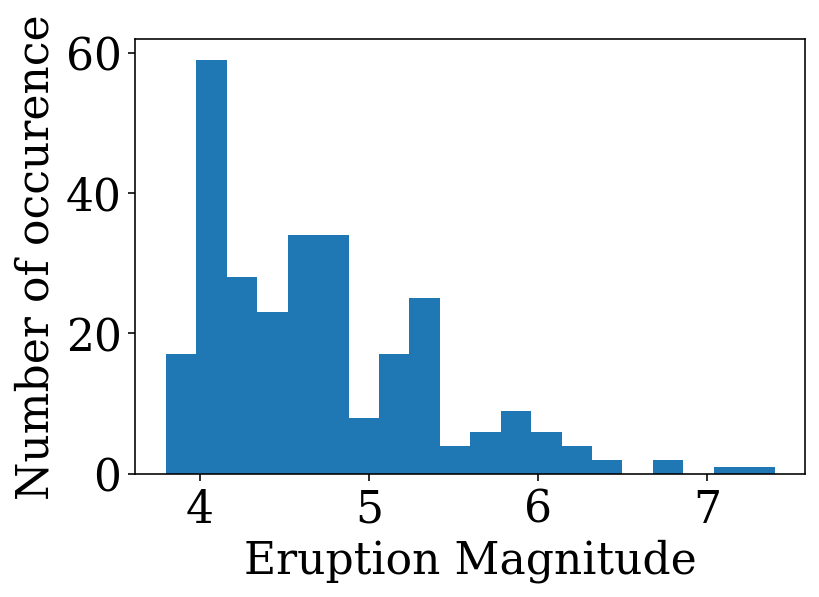

In [ ]:
## Long tail distribution
matplotlib.rcParams.update({'font.size': 22})
plt.hist(volcano_data['M'],bins = 20)
plt.xlabel('Eruption Magnitude')
plt.ylabel('Number of occurence')

## Visualize with the time scale

Text(0, 0.5, 'Eruption Magnitude')

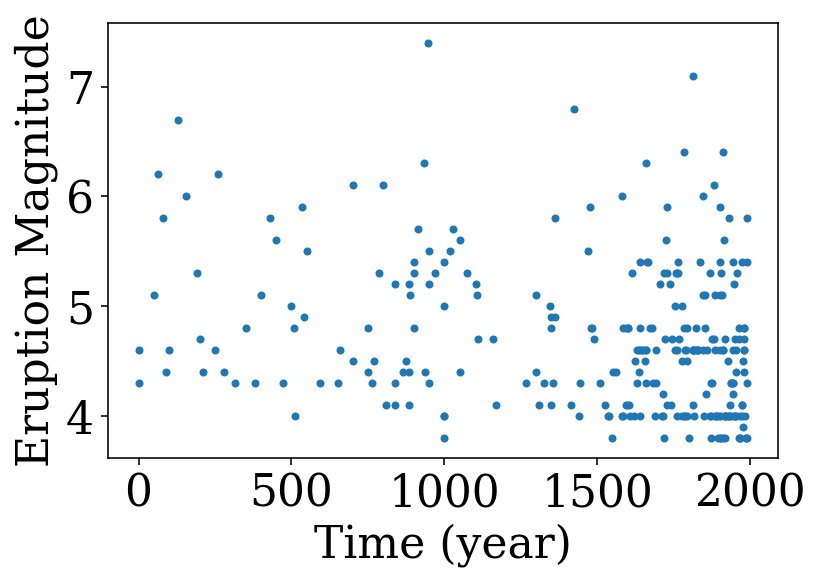

In [ ]:
plt.plot(volcano_data['Year'], volcano_data['M'],'.')
plt.xlabel('Time (year)')
plt.ylabel('Eruption Magnitude')

We notice that there must be underreporting for the early years. Fewer volcanos are documented before 1750.

Let's just visualize the volcanos after 1750.

In [ ]:
volcano_data = volcano_data[volcano_data['Year']>1750]

Text(0, 0.5, 'Eruption Magnitude')

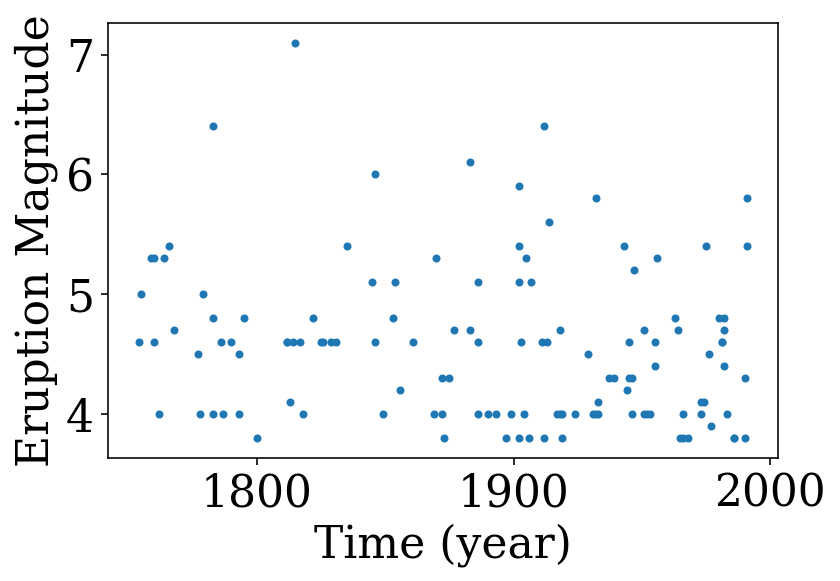

In [ ]:
plt.plot(volcano_data['Year'], volcano_data['M'],'.')
plt.xlabel('Time (year)')
plt.ylabel('Eruption Magnitude')

## Summary Statistics

In [ ]:
# Mean
print('Mean: '+str(np.round(np.mean(volcano_data['M']),2)))

# Variance
print('Variance: '+str(np.round(np.var(volcano_data['M']),2)))

# Maximum
print('Maximum: '+str(np.round(np.max(volcano_data['M']),2)))

Mean: 4.56
Variance: 0.42
Maximum: 7.1


## Logarithm

Histogram of logarithms

([<matplotlib.axis.XTick at 0x7faa512c1150>,
 [Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6'), Text(0, 0, '7')])

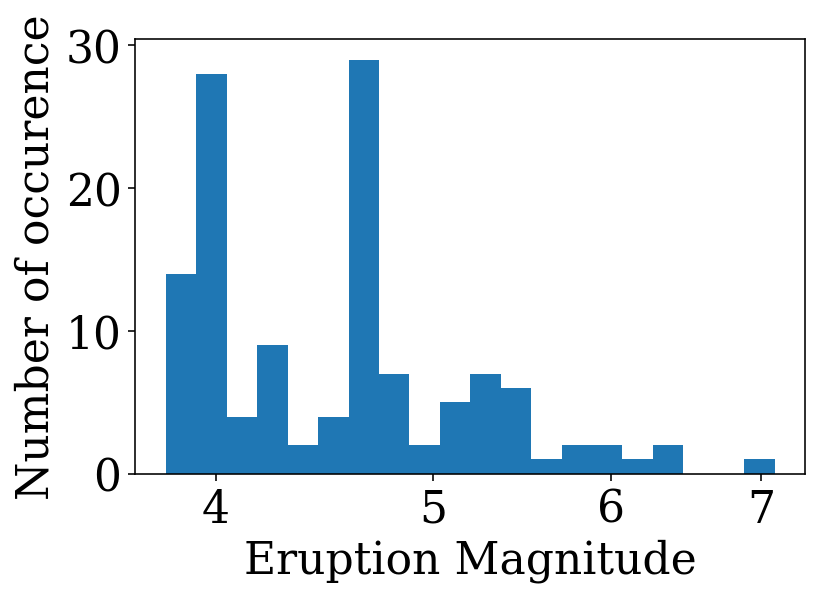

In [ ]:
matplotlib.rc("figure", figsize=(6,4))
plt.hist(np.log10(volcano_data['M']),bins = 20)
plt.xlabel('Eruption Magnitude')
plt.ylabel('Number of occurence')
plt.xticks(np.log10([4,5,6,7]),[4,5,6,7])

Lognormal quantile plot

In [ ]:
from statsmodels.graphics.gofplots import qqplot

([<matplotlib.axis.YTick at 0x7faa510594d0>,
 [Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6'), Text(0, 0, '7')])

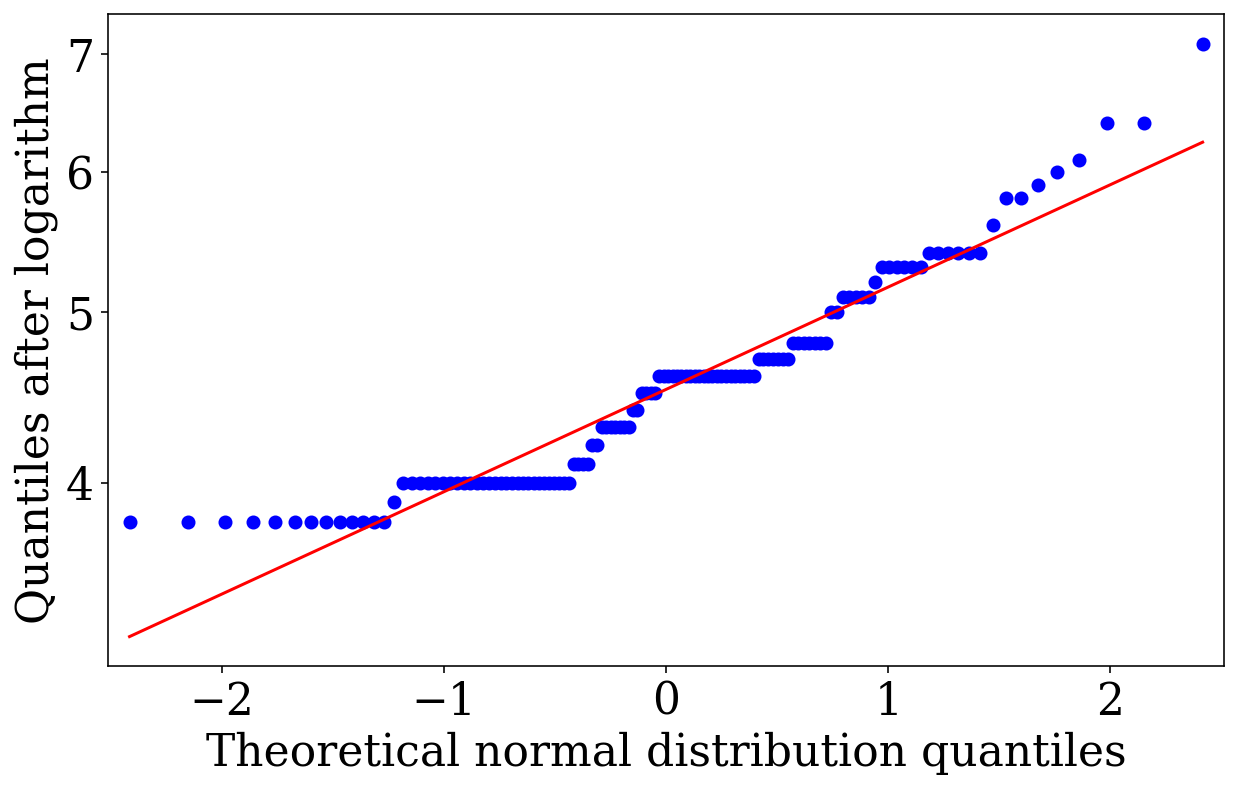

In [ ]:
matplotlib.rc("figure", figsize=(10,6))
fig = qqplot(np.log10(volcano_data['M']), line= 's')
plt.xlabel('Theoretical normal distribution quantiles')
plt.ylabel('Quantiles after logarithm')
plt.yticks(np.log10([4,5,6,7]),[4,5,6,7])